In [1]:
import pandas as pd
import numpy as np


### Data stored in a zip file, code to Unzip the data, extract the data and load it into a dataframe

In [63]:
import zipfile
import pandas as pd
import os

# Correct path to the zip file
zip_file_path = 'C:\\Users\\ADDIS\\Desktop\\BankData1.zip'
unzip_folder = 'C:\\Users\\ADDIS\\Desktop\\BankData1_unzipped'  # Folder to extract files

# Step 1: Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_folder)

# Step 2: Check the extracted files
extracted_files = os.listdir(unzip_folder)
print("Extracted files:", extracted_files)

# Step 3: Load the data into a DataFrame (assuming CSV format)
csv_file_path = os.path.join(unzip_folder, extracted_files[0])  # Assuming first file is the data file
data = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(data.head())


Extracted files: ['Churn_Modelling.csv']
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3

## Data Explanation


1. RowNumber:            Unique sequential number assigned to each row.

2. CustomerId:           Unique identifier assigned to each customer.

3. Surname:              Surname (last name) of the customer.

4. CreditScore:          Numerical representation of the customer's creditworthiness.

5. Geography:            Country where the customer resides.

6. Gender:               Gender of the customer (e.g., Male, Female).

7. Age:                  Age of the customer.

8. Tenure:               Number of years the customer has been with the bank.

9. Balance:              Account balance of the customer in their bank account.

10. NumOfProducts:        Number of products the customer has purchased from the bank.   

11. HasCrCard:            Indicates whether the customer has a credit card (1 = Yes, 0 = No).

12. IsActiveMember:       Indicates whether the customer is an active member (1 = Active, 0 = Inactive).

13. EstimatedSalary:      Estimated annual salary of the customer.

14. Exited:               Indicates whether the customer exited the bank (1 = Exited, 0 = Retained).

### code to see the columns in the dataset and their datatypes

In [3]:
# Display Data Types of Each Column
for column in data.columns:
    print(f"{column}: {data[column].dtype}")

RowNumber: int64
CustomerId: int64
Surname: object
CreditScore: int64
Geography: object
Gender: object
Age: int64
Tenure: int64
Balance: float64
NumOfProducts: int64
HasCrCard: int64
IsActiveMember: int64
EstimatedSalary: float64
Exited: int64


### Code to check for missing data

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.shape

(10000, 14)

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# EDA

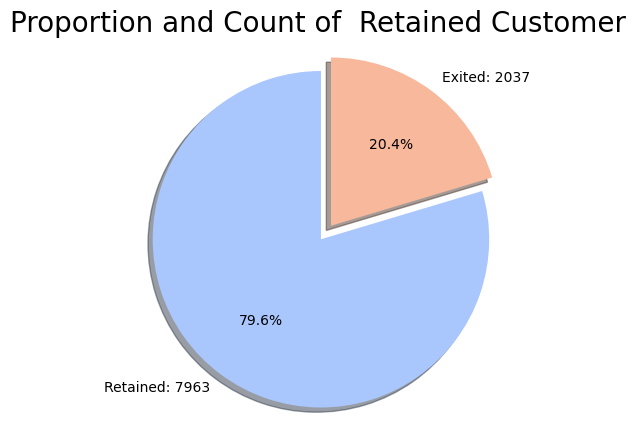

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the counts for exited and retained customers
exited_count = data.Exited[data['Exited'] == 0].count()
retained_count = data.Exited[data['Exited'] == 1].count()

# Define the labels with both counts and percentages
labels = [f'Retained: {exited_count}', f'Exited: {retained_count}']
sizes = [exited_count, retained_count]
explode = (0, 0.1)

# Get the coolwarm palette from seaborn
colors = sns.color_palette('coolwarm', len(labels))

# Set the figure size
fig1, ax1 = plt.subplots(figsize=(8, 5))

# Create the pie chart with the specified colors
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set the title
plt.title("Proportion and Count of  Retained Customer ", size=20)

# Display the plot
plt.show()


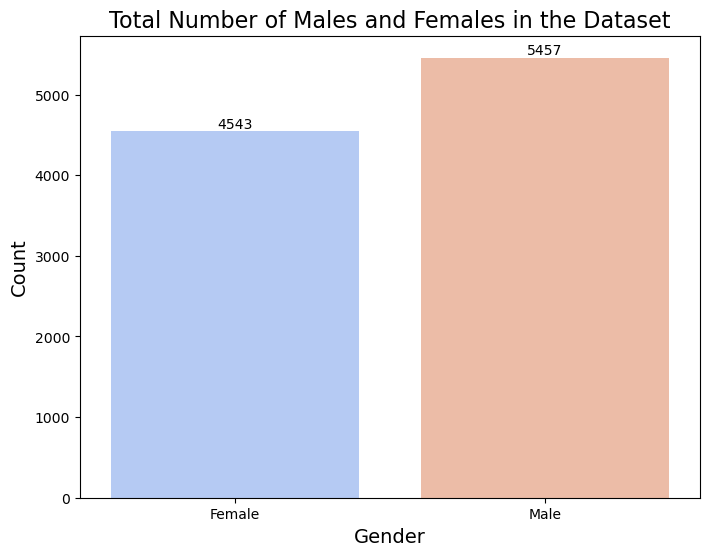

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the count plot for the gender column
gender_plot = sns.countplot(x='Gender', data=data, palette='coolwarm')

# Set the title
ax.set_title('Total Number of Males and Females in the Dataset', fontsize=16)

# Add labels to axes
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add the counts on top of each bar
for container in gender_plot.containers:
    gender_plot.bar_label(container)

# Show the plot
plt.show()


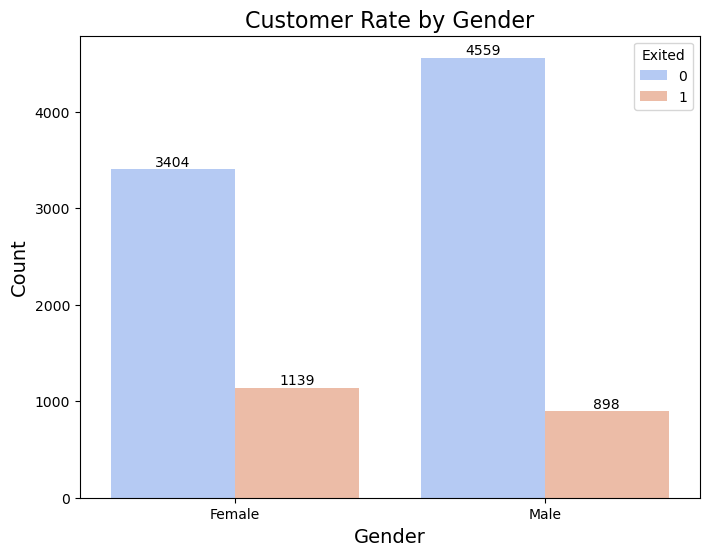

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Exited' column to string type to properly plot it as categories
data['Exited'] = data['Exited'].astype(str)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the count plot for churn by gender
bar_plot = sns.countplot(x='Gender', hue='Exited', data=data, ax=ax, palette='coolwarm', hue_order=['0', '1'])

# Set the title
ax.set_title('Customer Rate by Gender', fontsize=16)

# Add labels to axes
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add the counts on top of each bar
for container in bar_plot.containers:
    bar_plot.bar_label(container)

# Show the plot
plt.show()


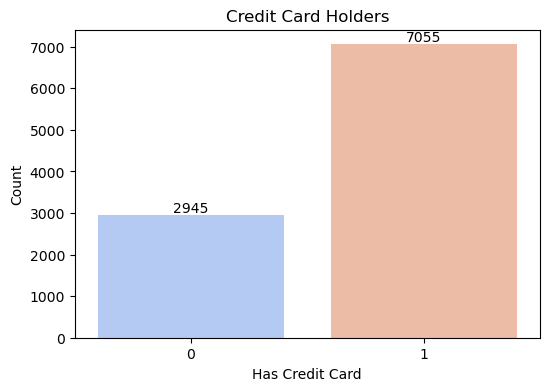

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data, x='HasCrCard', palette='coolwarm')  # Set a single color
plt.title('Credit Card Holders')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')

# Add total counts as labels on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')  # Position the labels above the bars

plt.show()


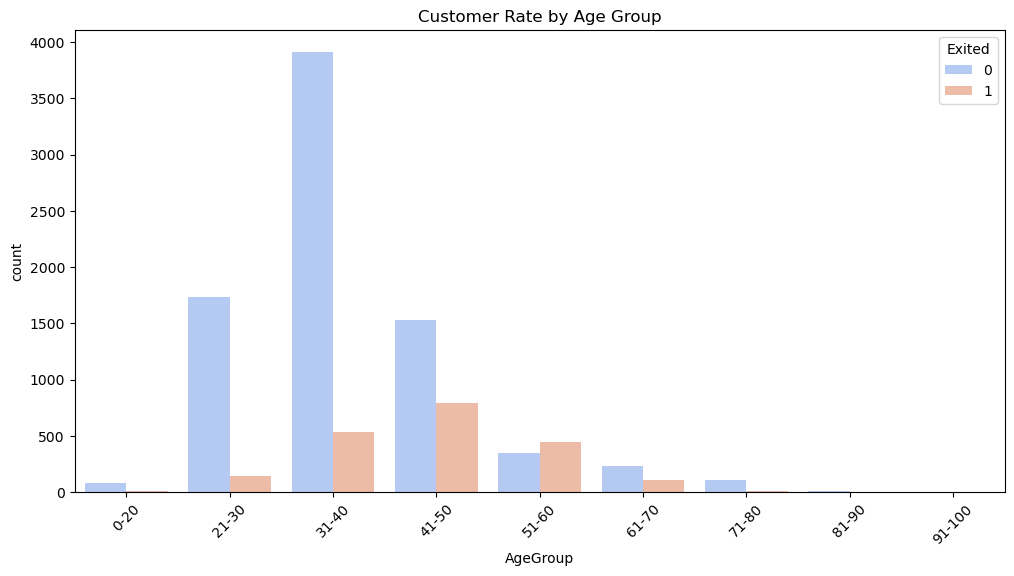

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Ignore specific FutureWarning
warnings.filterwarnings("ignore", message="The default of observed=False is deprecated", category=FutureWarning)

# Categorize 'Age' into groups for better visualization
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Convert 'Exited' column to string type
data['Exited'] = data['Exited'].astype(str)

# Prepare figure layout for Age Group Analysis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot churn rate by Age Group
sns.countplot(x='AgeGroup', hue='Exited', data=data, ax=ax, palette='coolwarm', hue_order=['0', '1'])
ax.set_title('Customer Rate by Age Group')
ax.tick_params(axis='x', rotation=45)

# Show the plot
plt.show()


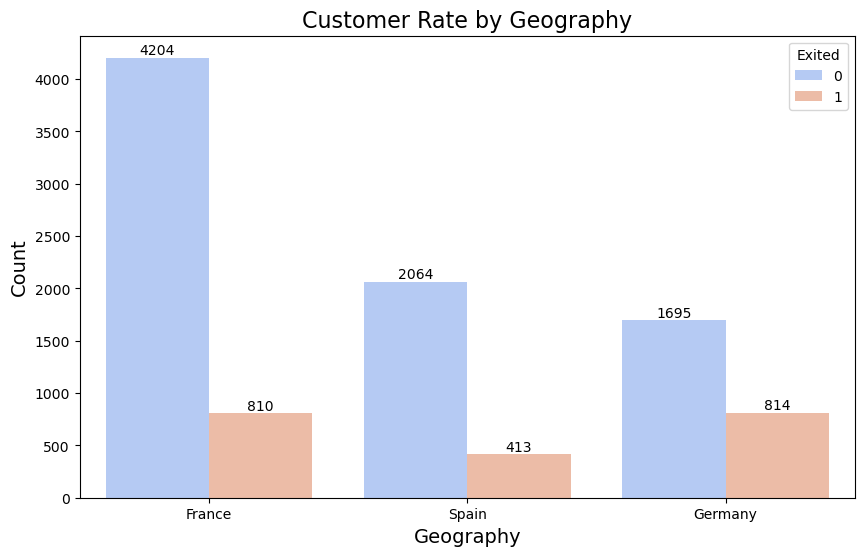

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Exited' column to string type to properly plot it as categories
data['Exited'] = data['Exited'].astype(str)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the count plot for churn by geography
geo_plot = sns.countplot(x='Geography', hue='Exited', data=data, palette='coolwarm', hue_order=['0', '1'])

# Set the title
ax.set_title('Customer Rate by Geography', fontsize=16)

# Add labels to axes
ax.set_xlabel('Geography', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add the counts on top of each bar
for container in geo_plot.containers:
    geo_plot.bar_label(container)

# Show the plot
plt.show()


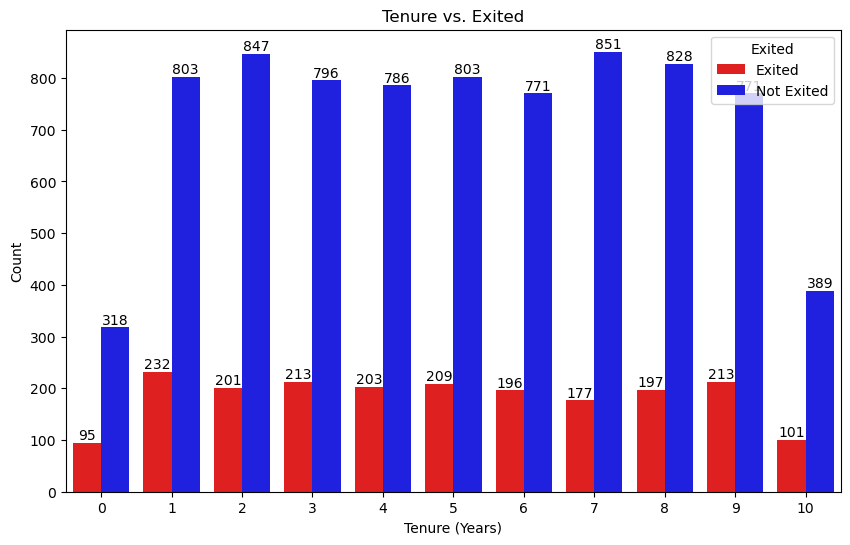

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Exited' values are correctly mapped to string labels
data['Exited'] = data['Exited'].replace({1: 'Exited', 0: 'Not Exited'})

# Create the plot with a custom palette that switches the colors for 0 and 1
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Tenure', hue='Exited', palette={'Not Exited': 'blue', 'Exited': 'red'})

# Set the title and labels
plt.title('Tenure vs. Exited')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Show the plot
plt.show()


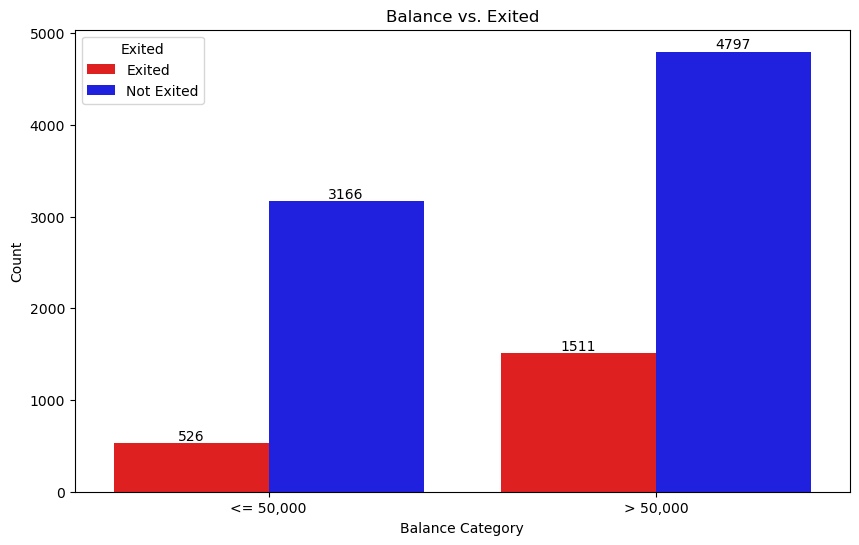

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Binning the 'Balance' column into two categories: <= 50,000 and > 50,000
data['Balance Category'] = pd.cut(data['Balance'], bins=[-1, 50000, data['Balance'].max()], labels=['<= 50,000', '> 50,000'])

# Ensure 'Exited' values are mapped to string labels for clarity
data['Exited'] = data['Exited'].replace({1: 'Exited', 0: 'Not Exited'})

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Balance Category', hue='Exited', palette={'Not Exited': 'blue', 'Exited': 'red'})

# Set the title and labels
plt.title('Balance vs. Exited')
plt.xlabel('Balance Category')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Show the plot
plt.show()


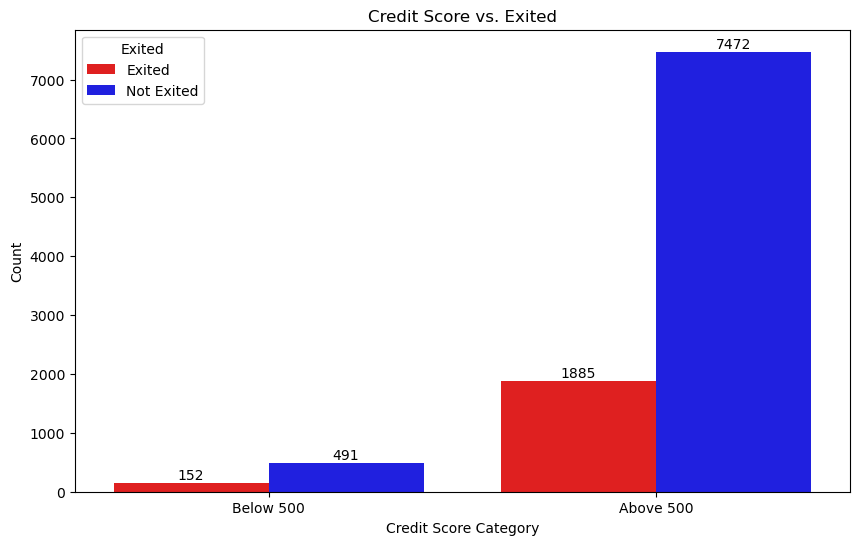

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Make sure 'CreditScore' has no negative values or anomalies
data = data[data['CreditScore'] >= 0]

# Binning the 'CreditScore' column into two categories: Below 500 and Above 500
data['CreditScore Category'] = pd.cut(data['CreditScore'], bins=[-1, 500, data['CreditScore'].max()], labels=['Below 500', 'Above 500'])

# Ensure 'Exited' values are mapped to string labels for clarity
data['Exited'] = data['Exited'].replace({1: 'Exited', 0: 'Not Exited'})

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='CreditScore Category', hue='Exited', palette={'Not Exited': 'blue', 'Exited': 'red'})

# Set the title and labels
plt.title('Credit Score vs. Exited')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Show the plot
plt.show()


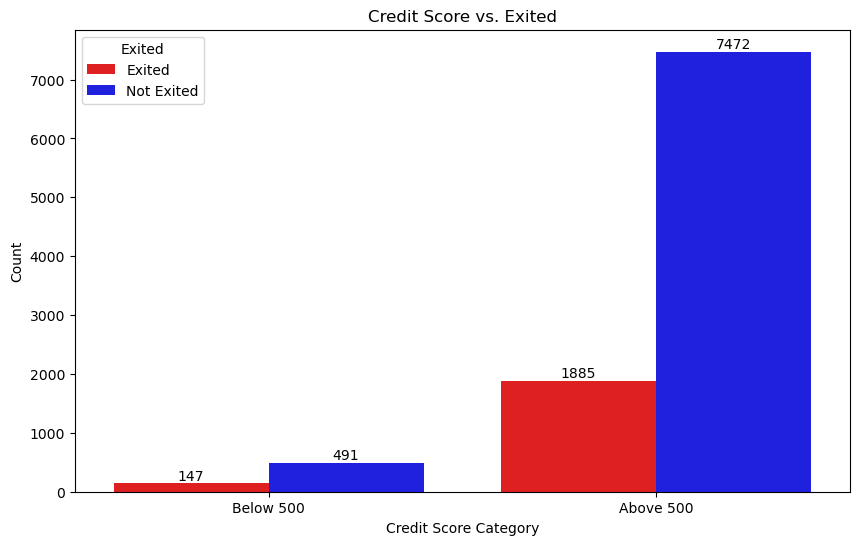

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'CreditScore' has no negative values or anomalies
data = data[data['CreditScore'] >= 350]  # Optional since the min is 350

# Binning the 'CreditScore' column into two categories: Below 500 and Above 500
data['CreditScore Category'] = pd.cut(data['CreditScore'], bins=[350, 500, 850], labels=['Below 500', 'Above 500'])

# Ensure 'Exited' values are mapped to string labels for clarity
data['Exited'] = data['Exited'].replace({1: 'Exited', 0: 'Not Exited'})

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='CreditScore Category', hue='Exited', palette={'Not Exited': 'blue', 'Exited': 'red'})

# Set the title and labels
plt.title('Credit Score vs. Exited')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Show the plot
plt.show()


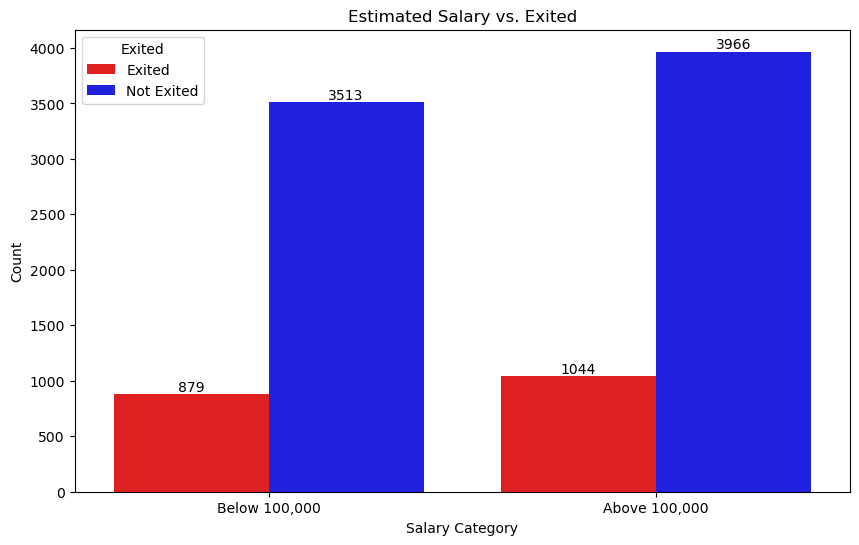

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Binning the 'EstimatedSalary' column into two categories: Below 100,000 and Above 100,000
data['Salary Category'] = pd.cut(data['EstimatedSalary'], bins=[12000, 100000, 200000], labels=['Below 100,000', 'Above 100,000'])

# Ensure 'Exited' values are mapped to string labels for clarity
data['Exited'] = data['Exited'].replace({1: 'Exited', 0: 'Not Exited'})

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Salary Category', hue='Exited', palette={'Not Exited': 'blue', 'Exited': 'red'})

# Set the title and labels
plt.title('Estimated Salary vs. Exited')
plt.xlabel('Salary Category')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Show the plot
plt.show()


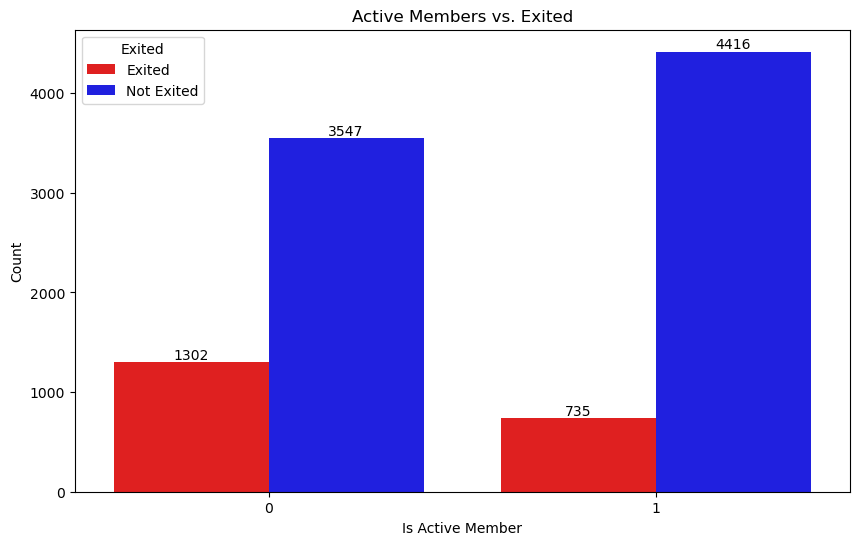

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Exited' values are mapped to string labels for clarity
data['Exited'] = data['Exited'].replace({1: 'Exited', 0: 'Not Exited'})

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='IsActiveMember', hue='Exited', palette={'Not Exited': 'blue', 'Exited': 'red'})

# Set the title and labels
plt.title('Active Members vs. Exited')
plt.xlabel('Is Active Member')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Show the plot
plt.show()


In [72]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


# Project Summary: Customer Retention and Attrition Analysis

In this project, I analyzed customer retention and attrition trends to understand the factors leading to customer loyalty and what contributes to their departure. The study aimed to identify demographic patterns and behavioral traits of retained and lost customers to improve customer retention strategies.

## Key Findings:

### Gender Distribution:

There is an almost equal number of male (5,457) and female (5,453) customers.

Male Retention: 4,559 males were retained, while 898 left.

Female Retention: 3,404 females were retained, while 1,139 left


### Credit Card Usage:

Retained Customers: 2,945 retained customers do not use credit cards.

Lost Customers: A significant 7,055 lost customers use credit cards, suggesting that credit card users are more likely to leave.


### Age Groups:

Age 31-40: This age group has the highest number of retained customers.

Age 41-50: This age group has the highest number of customers leaving, indicating a trend of higher attrition in this 
demographic.


### Geography and Customer Distribution:

Customers were visualized based on geography, providing insight into regional trends in customer retention and attrition.
Customer Tenure:

There is an equal distribution of customers leaving across the first 1-9 years of membership.
Customers with less than one year are less likely to leave, while customers with more than 10 years tend to be loyal and stay longer.


### Customer Activity Status:

Active Retained Customers: 3,454 retained customers are active, while 1,302 are not.

Active Lost Customers: 4,416 customers who left were previously active members, indicating that customer engagement does not necessarily prevent attrition.

### Importance of Findings:

Credit Card Usage and Attrition: The most striking observation is that a large proportion of lost customers use credit cards.

This insight could indicate that credit card-related issues (e.g., fees, interest rates) may be a factor driving customers to leave.

Companies could focus on improving credit card benefits or better managing customer expectations to reduce attrition in this group.

### Age Group Insights: 
Customers aged 31-40 are more likely to stay, while those aged 41-50 have higher attrition rates. This suggests targeted retention strategies for older customers could be crucial. Tailoring communication, services, and products for different age groups may improve retention.

### Loyalty of Long-Term Customers:
The finding that customers with more than 10 years of tenure are highly loyal indicates that investing in long-term customer relationships can lead to sustained retention. It also underscores the value of loyalty programs and incentives for long-term members.

### Active Customer Behavior: 
The analysis shows that simply being active doesn’t guarantee retention, as a high number of active customers still left. This highlights the importance of deeper engagement strategies and personalized experiences to keep customers satisfied and committed to the company.

### Geographical Trends:
Understanding geographic patterns can help businesses tailor regional retention strategies, identifying areas that may require more targeted marketing or customer service efforts.


### Tenure and Leaving Trends: 
Equal attrition rates across 1-9 years suggest that customers are at risk of leaving throughout their membership. Retention efforts should not be focused solely on new customers but should extend to those in the middle of their customer journey as well.

### Conclusion:
The project uncovered critical insights into customer retention and attrition trends, including the impact of credit card usage, age, customer tenure, and activity levels. These findings are vital for formulating strategies that enhance customer loyalty, reduce attrition, and ultimately drive business growth. By addressing these factors, businesses can better manage customer relationships and improve long-term retention.